# Pre-procesamiento

El documento original es un documento de MS Excel (.xlsx) compuesto cuyas celdas son tratadas principalmente como texto en Español. Para un correcto procesamiento es necesari lo siguiente:

*1. Cambiar todas las comas (,) por punto y comas (;):* Esto para que no interfiera con la conversión a UTF-8 .csv y el procesamiento realizado en las librerías de python, centradas principalmente en procesar datos en inglés.

*2. Cambiar las letras tildadas:* Se cambia cada vocal tildada por la vocal sin tilde para que, nuevamente, no interfieran con el procesamiento posterior de las librerías de python y para conservar la interpretabilidad. 

*3. Borrar la cabecera:* La cabecera incluye el escudo de la Gobernación de Antioquia y el título de la tabla. Esta file puede interfiere con el procesamiento en AWS y con las librerías, por lo que se optó por suprimirla.

*4. Convertir a UTF-8 .csv:* Esto para facilitar el procesamiento por parte de las librerías de python.

El plan propuesto a seguir para el procesamiento de los datos previo al uso del modelo es el siguiente:

![Plan](plan.png)

# Procesamiento de duplicados

Con el fin de optimizar el tiempo de procesamiento y tras un análisis del dataset se tomó la decisión de identificar y depurar los registros cuya cédula está duplicada. Esto implica tener en cuenta que, si bien se pretende conservar el registro más reciente de cada cédula, este registro puede tener información faltante que registros previos de la misma cédula pueden llegar a tener. A continuación, se puede apreciar un ejemplo de dos registros que comparten cédula, sin embargo el registro más reciente tiene menos información que el anterior:

| Campo                                                       | Duplicado 1                          | Duplicado 2              | Duplicado 3                          |
| :---------------------------------------------------------- | :----------------------------------- | :----------------------- | :----------------------------------- |
| ObjectID                                                    | 7974                                 | 42123                    | 46966                                |
| Fecha de la encuesta                                        | 26/07/2024 17:00                     | 5/08/2024 17:00          | 11/09/2024 17:00                     |
| Nombres y apellidos del encuestador                         | GREGORY SANDOVAL URIBE               | CAROL MARTINEZ           | CAROL MARTINEZ                       |
| Tipo de documento del encuestador                           | Cedula de ciudadania                 | Cedula de ciudadania     | Cedula de ciudadania                 |
| Numero de documento del encuestador                         | 1036190564                           | 1047966705               | 1047966705                           |
| Subregion (PcD)                                             | Oriente                              | Oriente                  | Oriente                              |
| Municipio de residencia (PcD)                               | Nariño                               | Nariño                   | Nariño                               |
| Zona de residencia (PcD)                                    | Rural                                | Rural                    | Rural                                |
| Nombre del Barrio o Vereda (PcD)                            | VEREDA EL LLANO                      | EL LLANO                 | EL LLANO                             |
| Direccion de la residencia (PcD)                            | EL LLANO                             | VEREDA EL LLANO          | EL LLANO                             |
| Telefono (PcD)                                              | 3145203259                           | 3225239605               | 3145203259                           |
| Primer nombre de la PcD                                     | HERNAN                               | HERNAN                   | HERNAN                               |
| Segundo nombre de la PcD                                    |                                      |                          |                                      |
| Primer apellido de la PcD                                   | GIRALDO                              | GIRALDO                  | GIRALDO                              |
| Segundo apellido de la PcD                                  | MARTINEZ                             | MARTINEZ                 | MARTINEZC                            |
| Tipo de documento (PcD)                                     | Cedula                               | Cedula                   | Cedula                               |
| Numero de documento (PcD)                                   | 98677872                             | 98677872                 | 98677872                             |
| Correo (PcD)                                                | saludpublica@narino-antioquia.gov.co |                          | saludpublica@narino-antioquia.gov.co |
| Fecha de nacimiento (PcD)                                   | 27/08/1984 17:00                     | 27/08/1984 17:00         | 27/08/1984 17:00                     |
| Edad de la PcD                                              | 39                                   | 39                       | 40                                   |
| Sexo (PcD)                                                  | Hombre                               | Hombre                   | Hombre                               |
| Estado civil (PcD)                                          | Soltero(a)                           | Soltero(a)               | Soltero(a)                           |
| Nivel de escolaridad (PcD)                                  | Secundaria incompleta                | Ninguno                  | Secundaria incompleta                |
| Tipo de Vivienda                                            | Familiar                             | Familiar                 | Familiar                             |
| Estrato socioeconomico (PcD)                                | Estrato 1                            | Estrato 1                | Estrato 1                            |
| Actividad Laboral                                           | Empleado                             | No puede trabajar        | No puede trabajar                    |
| Describa su emprendimiento                                  |                                      |                          |                                      |
| Grupo poblacional en que se reconoce (PdC)                  | Ninguno                              | Ninguno                  | Ninguno                              |
| Etnia - Cabildo al que pertenece (PcD)                      |                                      |                          |                                      |
| Pertenece a Comunidad LGTBIQ+                               | No                                   | No                       | No                                   |
| Pertenece a Poblacion Victima (RUV)                         | Si                                   | Si                       | No                                   |
| Hecho Victimizante                                          | Desplazamiento_forzado               | Desplazamiento_forzado   |                                      |
| Pertenece a poblacion Campesina                             | Si                                   | Si                       | Si                                   |
| Pertenece a poblacion Migrante                              | No                                   | No                       | No                                   |
| Tiene afiliacion al sistema de salud                        | Si                                   | Si                       | Si                                   |
| Tipo de afiliacion regimen de salud                         | Regimen subsidiado                   | Regimen subsidiado       | Regimen subsidiado                   |
| EPS                                                         | Savia Salud                          | Savia Salud              | Savia Salud                          |
| Cual otra EPS                                               |                                      |                          |                                      |
| Recibe Pension                                              | No                                   | No                       | No                                   |
| Cual es el fondo de pensiones                               |                                      |                          |                                      |
| Tiene Certificado de Discapacidad                           | No                                   | No                       | Si                                   |
| Tipo de discapacidad                                        | Psicosocial                          | Intelectual              | Multiple                             |
| Tipo de discapacidad multiple                               |                                      |                          | Fisica;Intelectual                   |
| ¿Utiliza la Lengua de Señas Colombiana (LSC)?               |                                      |                          |                                      |
| Total de discapacidades seleccionadas                       |                                      |                          | 2                                    |
| Describa aqui el diagnostico medico                         | EPILEPSIA                            | EPILEPSIA                | MULTIPLE                             |
| Principalmente su discapacidad es consecuencia de           | Por enfermedad                       | Por enfermedad           | De nacimiento                        |
| Elementos de apoyo o ayudas tecnicas que utiliza            | Ninguno                              | Ninguno                  | Ninguno                              |
| ¿Ha accedido a programas de rehabilitacion?                 | No_recibe_rehabilitacion             | No_recibe_rehabilitacion | No_recibe_rehabilitacion             |
| ¿Que hace en su tiempo libre?                               | DESCANSAR                            | COMPARTIR EN FAMILIA     | COMPARTE EN FAMILIA                  |
| ¿En que tipo de actividades le gustaria participar?         | Ninguna                              | Familia;EduNoformal      | Productivas;Familia;EduNoformal      |
| Tiene cuidador                                              | No                                   | No                       | No                                   |
| Nombres y apellidos del cuidador                            |                                      |                          |                                      |
| Documento del Cuidador                                      |                                      |                          |                                      |
| Parentezco del cuidador con la PcD                          |                                      |                          |                                      |
| Telefono del cuidador                                       |                                      |                          |                                      |
| Como cuidador ¿ha visto afectada su salud?                  |                                      |                          |                                      |
| ¿De que manera?                                             |                                      |                          |                                      |
| ¿Ha visto limitadas sus posibilidades de ingreso economico? |                                      |                          |                                      |
| ¿Por que?                                                   |                                      |                          |                                      |
| ¿Ha recibido capacitacion como cuidador?                    |                                      |                          |                                      |
| Actividad Laboral del Cuidador                              |                                      |                          |                                      |
| Describa su emprendimiento                                  |                                      |                          |                                      |
| Hace parte del comite municipal de Discapacidad             | No                                   | No                       | No                                   |
| Hace parte de alguna Organizacion/Asociacion de PcD         | No                                   | No                       | No                                   |
| Como se llama la Organizacion/Asociacion                    |                                      |                          |                                      |
| Programas sociales en los que participa                     | Ninguno                              | Ninguno                  | Ninguno                              |
| Cual o Cuales programas sociales                            |                                      |                          |                                      |
| A que espacios de participacion pertenece                   | Ninguno                              | Ninguno                  | Ninguno                              |
| Consentimiento Informado                                    | autorizo                             | autorizo                 | autorizo                             |
| CreationDate                                                | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              |
| EditDate                                                    | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              |
| Autorizacion de Comunicacion                                | autorizo                             | autorizo                 | autorizo                             |
| x                                                           | -75.1767315                          | 0                        | -75.17657245                         |
| y                                                           | 5.6100085                            | 0                        | 5.609893519                          |
|                                                             |                                      |                          |                                      |


Es por casos como este que se hace necesario la implementación de un merge (entendiéndolo como a la acción ejecutada en herrramientas de control de versiones como [GitHub](https://docs.github.com/en/repositories/configuring-branches-and-merges-in-your-repository/configuring-pull-request-merges/about-merge-methods-on-github)); el resultado es el registro más reciente, con su object_id original, complementando con información otorgada en el registro anterior aquellos campos que estaban originalmente vacíos.

| Campo                                                       | Duplicado 1                          | Duplicado 2              | Duplicado 3                          | Registro final                       |
| :---------------------------------------------------------- | :----------------------------------- | :----------------------- | :----------------------------------- | :----------------------------------- |
| ObjectID                                                    | 7974                                 | 42123                    | 46966                                | 46966                                |
| Fecha de la encuesta                                        | 26/07/2024 17:00                     | 5/08/2024 17:00          | 11/09/2024 17:00                     | 11/09/2024 17:00                     |
| Nombres y apellidos del encuestador                         | GREGORY SANDOVAL URIBE               | CAROL MARTINEZ           | CAROL MARTINEZ                       | CAROL MARTINEZ                       |
| Tipo de documento del encuestador                           | Cedula de ciudadania                 | Cedula de ciudadania     | Cedula de ciudadania                 | Cedula de ciudadania                 |
| Numero de documento del encuestador                         | 1036190564                           | 1047966705               | 1047966705                           | 1047966705                           |
| Subregion (PcD)                                             | Oriente                              | Oriente                  | Oriente                              | Oriente                              |
| Municipio de residencia (PcD)                               | Nariño                               | Nariño                   | Nariño                               | Nariño                               |
| Zona de residencia (PcD)                                    | Rural                                | Rural                    | Rural                                | Rural                                |
| Nombre del Barrio o Vereda (PcD)                            | VEREDA EL LLANO                      | EL LLANO                 | EL LLANO                             | EL LLANO                             |
| Direccion de la residencia (PcD)                            | EL LLANO                             | VEREDA EL LLANO          | EL LLANO                             | EL LLANO                             |
| Telefono (PcD)                                              | 3145203259                           | 3225239605               | 3145203259                           | 3145203259                           |
| Primer nombre de la PcD                                     | HERNAN                               | HERNAN                   | HERNAN                               | HERNAN                               |
| Segundo nombre de la PcD                                    |                                      |                          |                                      |                                      |
| Primer apellido de la PcD                                   | GIRALDO                              | GIRALDO                  | GIRALDO                              | GIRALDO                              |
| Segundo apellido de la PcD                                  | MARTINEZ                             | MARTINEZ                 | MARTINEZC                            | MARTINEZC                            |
| Tipo de documento (PcD)                                     | Cedula                               | Cedula                   | Cedula                               | Cedula                               |
| Numero de documento (PcD)                                   | 98677872                             | 98677872                 | 98677872                             | 98677872                             |
| Correo (PcD)                                                | saludpublica@narino-antioquia.gov.co |                          | saludpublica@narino-antioquia.gov.co | saludpublica@narino-antioquia.gov.co |
| Fecha de nacimiento (PcD)                                   | 27/08/1984 17:00                     | 27/08/1984 17:00         | 27/08/1984 17:00                     | 27/08/1984 17:00                     |
| Edad de la PcD                                              | 39                                   | 39                       | 40                                   | 40                                   |
| Sexo (PcD)                                                  | Hombre                               | Hombre                   | Hombre                               | Hombre                               |
| Estado civil (PcD)                                          | Soltero(a)                           | Soltero(a)               | Soltero(a)                           | Soltero(a)                           |
| Nivel de escolaridad (PcD)                                  | Secundaria incompleta                | Ninguno                  | Secundaria incompleta                | Secundaria incompleta                |
| Tipo de Vivienda                                            | Familiar                             | Familiar                 | Familiar                             | Familiar                             |
| Estrato socioeconomico (PcD)                                | Estrato 1                            | Estrato 1                | Estrato 1                            | Estrato 1                            |
| Actividad Laboral                                           | Empleado                             | No puede trabajar        | No puede trabajar                    | No puede trabajar                    |
| Describa su emprendimiento                                  |                                      |                          |                                      |                                      |
| Grupo poblacional en que se reconoce (PdC)                  | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Etnia - Cabildo al que pertenece (PcD)                      |                                      |                          |                                      |                                      |
| Pertenece a Comunidad LGTBIQ+                               | No                                   | No                       | No                                   | No                                   |
| Pertenece a Poblacion Victima (RUV)                         | Si                                   | Si                       | No                                   | No                                   |
| Hecho Victimizante                                          | Desplazamiento_forzado               | Desplazamiento_forzado   |                                      | Desplazamiento_forzado               |
| Pertenece a poblacion Campesina                             | Si                                   | Si                       | Si                                   | Si                                   |
| Pertenece a poblacion Migrante                              | No                                   | No                       | No                                   | No                                   |
| Tiene afiliacion al sistema de salud                        | Si                                   | Si                       | Si                                   | Si                                   |
| Tipo de afiliacion regimen de salud                         | Regimen subsidiado                   | Regimen subsidiado       | Regimen subsidiado                   | Regimen subsidiado                   |
| EPS                                                         | Savia Salud                          | Savia Salud              | Savia Salud                          | Savia Salud                          |
| Cual otra EPS                                               |                                      |                          |                                      |                                      |
| Recibe Pension                                              | No                                   | No                       | No                                   | No                                   |
| Cual es el fondo de pensiones                               |                                      |                          |                                      |                                      |
| Tiene Certificado de Discapacidad                           | No                                   | No                       | Si                                   | Si                                   |
| Tipo de discapacidad                                        | Psicosocial                          | Intelectual              | Multiple                             | Multiple                             |
| Tipo de discapacidad multiple                               |                                      |                          | Fisica;Intelectual                   | Fisica;Intelectual                   |
| ¿Utiliza la Lengua de Señas Colombiana (LSC)?               |                                      |                          |                                      |                                      |
| Total de discapacidades seleccionadas                       |                                      |                          | 2                                    | 2                                    |
| Describa aqui el diagnostico medico                         | EPILEPSIA                            | EPILEPSIA                | MULTIPLE                             | MULTIPLE                             |
| Principalmente su discapacidad es consecuencia de           | Por enfermedad                       | Por enfermedad           | De nacimiento                        | De nacimiento                        |
| Elementos de apoyo o ayudas tecnicas que utiliza            | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| ¿Ha accedido a programas de rehabilitacion?                 | No_recibe_rehabilitacion             | No_recibe_rehabilitacion | No_recibe_rehabilitacion             | No_recibe_rehabilitacion             |
| ¿Que hace en su tiempo libre?                               | DESCANSAR                            | COMPARTIR EN FAMILIA     | COMPARTE EN FAMILIA                  | COMPARTE EN FAMILIA                  |
| ¿En que tipo de actividades le gustaria participar?         | Ninguna                              | Familia;EduNoformal      | Productivas;Familia;EduNoformal      | Productivas;Familia;EduNoformal      |
| Tiene cuidador                                              | No                                   | No                       | No                                   | No                                   |
| Nombres y apellidos del cuidador                            |                                      |                          |                                      |                                      |
| Documento del Cuidador                                      |                                      |                          |                                      |                                      |
| Parentezco del cuidador con la PcD                          |                                      |                          |                                      |                                      |
| Telefono del cuidador                                       |                                      |                          |                                      |                                      |
| Como cuidador ¿ha visto afectada su salud?                  |                                      |                          |                                      |                                      |
| ¿De que manera?                                             |                                      |                          |                                      |                                      |
| ¿Ha visto limitadas sus posibilidades de ingreso economico? |                                      |                          |                                      |                                      |
| ¿Por que?                                                   |                                      |                          |                                      |                                      |
| ¿Ha recibido capacitacion como cuidador?                    |                                      |                          |                                      |                                      |
| Actividad Laboral del Cuidador                              |                                      |                          |                                      |                                      |
| Describa su emprendimiento                                  |                                      |                          |                                      |                                      |
| Hace parte del comite municipal de Discapacidad             | No                                   | No                       | No                                   | No                                   |
| Hace parte de alguna Organizacion/Asociacion de PcD         | No                                   | No                       | No                                   | No                                   |
| Como se llama la Organizacion/Asociacion                    |                                      |                          |                                      |                                      |
| Programas sociales en los que participa                     | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Cual o Cuales programas sociales                            |                                      |                          |                                      |                                      |
| A que espacios de participacion pertenece                   | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Consentimiento Informado                                    | autorizo                             | autorizo                 | autorizo                             | autorizo                             |
| CreationDate                                                | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              | 57:51.9                              |
| EditDate                                                    | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              | 57:51.9                              |
| Autorizacion de Comunicacion                                | autorizo                             | autorizo                 | autorizo                             | autorizo                             |
| x                                                           | -75.1767315                          | 0                        | -75.17657245                         | -7.517.657.245                       |
| y                                                           | 5.6100085                            | 0                        | 5.609893519                          | 5.609.893.519                        |
|                                                             |                                      |                          |                                      |                                      |



Como se puede apreciar, el campo de `Hecho victimizante`, relevante según el stakeholder, se obtuvo del registro obtenido en la primera encuesta.

Para el correcto procesamiento posterior al tratamiento y conversión del archivo original de acuerdo a los pre-requisitos, los pasos que se siguieron para obtener un nuevo archivo limpio y sin duplicados fueron los siguientes:

## Detección de duplicados

Como paso inicial se creó el método `find_duplicate_cedulas` en el archivo `encontrar_cedulas_duplicadas.py` para identificarlas y generar otro .csv con los duplicados llamado `listado_cedulas_duplicadas_<timestamp>`; este .csv no será solo usado para debugging, sino también para tener trazabilidad y un registro de las cédulas que en pasos posteriores serán eliminadas.

In [3]:
from cedulas_duplicadas import find_duplicate_cedulas

file_path = "datasets/pcd_1211.csv"  # Reemplazar con el path del archivo
duplicates, duplicate_records, output_file = find_duplicate_cedulas(file_path)
    
print("\nDuplicado encontrados:")
if len(duplicates) > 0:
    print(duplicates)
    print(f"\nNúmero de registros duplicados: {len(duplicate_records)}")
else:
    print("No se encontraron duplicados")
    
print(f"\nTotal de registros procesados: {len(duplicate_records)}")


Los registros duplicados han sido guardados en: listado_cedulas_duplicadas_20241124_121446.csv

Duplicado encontrados:
extracted_cedula
43480068      5
1079290153    5
43649085      4
1037484900    4
1039696898    3
             ..
21430683      2
21426312      2
1032097716    2
1021938264    2
1015216346    2
Name: count, Length: 1051, dtype: int64

Número de registros duplicados: 2166

Total de registros procesados: 2166


Durante la creación de este método se percibió un gran número de registros con cédula "0", pertenecientes a diferentes personas sin identificación:

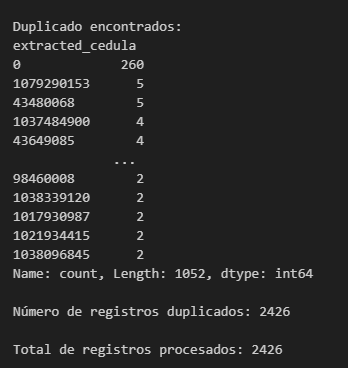

Con el fin de conservar la información de las personas sin identificación, los registros cuya cédula de ciudadanía es 0 serán omitidos por parte del detector de duplicados.

## "Merge" de datos actualizados 

Tomando el DataFrame de Panda retornado en el método anterior que contiene el listado de objetos que comparten cédula, se identifica la fila más reciente que contenga dicho número de cédula, se identifican los campos vacíos que tengan y finalmente se llenarán con información encontrada de esa columna en registros previos de la misma cédula, dándole prioridad a la información más actualizada.

La función imprime los campos faltantes de la fila antes y después de pasar por el método.

In [4]:
from merge_cedulas import fill_missing_info

filled_duplicate_records = fill_missing_info(duplicate_records, "Fecha de la encuesta")

# Display the filled records
print("\nFilled records:")
print(filled_duplicate_records)


Cédula: 1000314409
                                              Before Filling After Filling
Correo (PcD)                                             NaN           NaN
Describa su emprendimiento                               NaN           NaN
Etnia - Cabildo al que pertenece (PcD)                   NaN           NaN
Cual otra EPS                                            NaN   SAVIA SALUD
Cual es el fondo de pensiones                            NaN           NaN
Tipo de discapacidad multiple                            NaN           NaN
¿Utiliza la Lengua de Señas Colombiana (LSC)?            NaN           NaN
Total de discapacidades seleccionadas                    NaN           NaN
Describa su emprendimiento.1                             NaN           NaN
Como se llama la Organizacion/Asociacion                 NaN           NaN
Cual o Cuales programas sociales                         NaN           NaN

Cédula: 1000397676
                                              Before Filling

c:\Users\Lenovo\Visual\ARI\ARI\ProyectoIntegrador\prep-data\merge_cedulas.py:24: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  duplicate_records[date_column] = pd.to_datetime(duplicate_records[date_column], errors='coerce')



Cédula: 1001764370
                                              Before Filling  \
Correo (PcD)                                             NaN   
Describa su emprendimiento                               NaN   
Etnia - Cabildo al que pertenece (PcD)                   NaN   
Hecho Victimizante                                       NaN   
Cual otra EPS                                            NaN   
Cual es el fondo de pensiones                            NaN   
Tipo de discapacidad multiple                            NaN   
¿Utiliza la Lengua de Señas Colombiana (LSC)?            NaN   
Total de discapacidades seleccionadas                    NaN   
Describa su emprendimiento.1                             NaN   
Como se llama la Organizacion/Asociacion                 NaN   
Cual o Cuales programas sociales                         NaN   

                                                         After Filling  
Correo (PcD)                                                       NaN  
D

## Generación de un nuevo .csv 

Una vez identificados los registros duplicados y complementando el registro más reciente, se genera un nuevo archivo .csv (de nuevo, en formato UTF-8) sin duplicados llaado `clean_pcd_data.csv`.

In [5]:
from nuevo_excel import create_clean_csv

create_clean_csv(file_path, filled_duplicate_records, output_filename="clean_pcd_data.csv")

Datos limpiados guardados en clean_pcd_data.csv


# Manejo de coordenadas y su complejidad

Las coordenadas x, y de cada registro son las características con las cuales el sistema de información ArcGis se alimenta para permitir la visualización. La problemática principal asociada al dataset es, precisamente, errores cometidos durante el proceso de caracterización que afectan las coordenadas y con esto la localización de miles de registros, posicionándolos fuera de antioquia o guardándolos todos en un lugar específico.

Las coordenadas son registradas en el dataset a partir del lugar geográfico en el que fue completada la encuesta, por lo cual, si múltiples personas van por ejemplo a la sede de la alcaldía del municipio para ser encuestadas, sus coordenadas temrinarán representando un clúster alrededor de la sede de la alcaldía en el casco urbano del municipio. Otro factor que interviene es la conexión a internet al momento de completar la encuesta: si al enviarla no hay conexión a internet, la información periste hasta que el dispositivo tenga conexión, sin embargo las coordenadas son propensas a ser corrompidas.

Por esto, la corrección de coordenadas es crucial para una correcta caracterización y diagnóstico de la inclusión a nivel de Población con Discapacidad en el departamento de Antioquia.

A continuación, el plan para abordar esta problemática:

![image.png](attachment:image.png)

## Detección de coordenadas erróneas

Con el fin de identificar las coordenadas erróneas, es necesario comparar el resultado de la búsqueda con ArcGis con la vereda o el barrio registrado en el dataset.

A través de la API de ArcGis se pueden consultar las veredas con su nombre completo, sin embargo, en el dataset es común encontrarlas con el nombre modificado, incompleto o faltante. Algunos ejemplos que se pueden encontrar en el dataset en la columna "Nombre del Barrio o Vereda (PcD)" son:

- "concepcio" (nombre incompleto)
- "Calle santander 19" (No es el nombre de un barrio o una vereda, es una calle)
- "La pava" (Nombre correcto)

En vista de que debemos comparar y encontrar similitudes entre la vereda o barrio registrado en el dataset y el registrado en ArcGis, es necesario un *Procesamiento de nombres de Barrios y Veredas*, dividido en diferentes fases.

In [6]:
!pip install unidecode
!pip install arcgis
!pip install rapidfuzz
!pip install pandas
!pip install openpyxl

Inicialmente se realiza es proceso de normalización, eliminando las tildes y reescribiendo los nombres en minúsculas, estandarizando así el formato del texto que los métodos van a recibir y haciendo más fácil y precisa la comparación entre dos nombres de localidades.

El dataset original, aún sin duplicados, es sumamente grande. Debido a la complejidad computacional y el constante llamado a APIs externas, por lo que se hace necesario usar una muestra más reducida. Usando el código `sample.py` es posible generar un nuevo dataset tomando *n* elementos aleatorios del documento generado en pasos anteriores `clean_data_pcd.csv`, sin embargo el .zip anexado con la presente entrega incluye un documento con 300 registros aleatorios llamado `sampled_file.csv`, con el que se correrá el siguiente documento.


In [7]:
# Normalización de nombres de municipios, barrios y veredas en la versión limpia del dataset original

from normalizar_texto import agregar_columnas_normalizadas

#file_path = "clean_pcd_data.csv"
file_path = "datasets/sampled_file.csv"

# Llamar al método y almacenar el resultado
dataset_actualizado = agregar_columnas_normalizadas(file_path)

# Verificar las nuevas columnas
print(dataset_actualizado[["Municipio_normalizado", "BarrioVereda_normalizado"]].head())


  Municipio_normalizado BarrioVereda_normalizado
0                itagui                 san jose
1              rionegro                   capiro
2                 anori                guacamaya
3              cisneros             calle boyaca
4         san francisco                  inojosa


Adicionalmente, durante la elaboración del presente documento se hizo notable que la presencia de datos "Not a Number" (NaN), especialmente en las columnas sobre las coordenadas (x, y), obstaculizan el procesamiento de los datos. Es por esto que las coordenadas que están vacías o representadas como 0.0 son representadas con las coordenadas del municipio.

In [8]:
import pandas as pd
import verificacion as ver

# Initialize a counter
processed_count = 0

# Wrapper function to track processed rows
def wrapper_with_count(row):
    global processed_count
    # Check if the row meets the invalid state condition before processing
    invalid_states = [None, "", "0.0", "nan"]
    if pd.isna(row["x"]) or pd.isna(row["y"]) or row["x"] in invalid_states or row["y"] in invalid_states:
        processed_count += 1
    return ver.data_verification(row)

# Apply the function using the wrapper
dataset_actualizado = dataset_actualizado.apply(wrapper_with_count, axis=1)

# Display the total number of processed rows
print(f"Total rows processed: {processed_count}")



---------------------------------------------------------------------
Procesando object id 29757
---------------------------------------------------------------------
Procesando object id 36555
Coordenadas encontradas en el dataset original: nan, nan
Geocoding municipio: rionegro
Geocode Results: [{'address': 'Rionegro, Antioquia', 'location': {'x': -75.37413, 'y': 6.15367}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Rionegro, Antioquia', 'LongLabel': 'Rionegro, Antioquia, COL', 'ShortLabel': 'Rionegro', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Rionegro', 'Place_addr': 'Rionegro, Antioquia', 'Phone': '', 'URL': '', 'Rank': 8.5, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block'

Habiendo normalizado los nombres de las veredas y municipios y habiendo rellenado las coordenadas no válidas, el procesamiento de texto se hace mucho más sencillo. A continuación, se evalúan cuáles registros de la columna "Zona de residencia (PcD)" corresponden a la Zona Rural de su municipio y cuáles a la Zona Urbana. Esto porque la Zona Urbana en lugar de estar dividida en veredas, está dividida en barrios, y dichos barrios (así como zonas descritas a partir de nombres de calles o direcciones) no siempre se encuentran disponibles en los mapas de ArcGis para todos los municipios. El procesamiento de direcciones y barrios de las zonas urbanas está destinado para entregas futuras.

In [9]:
import coordenadas_arcgis as ag 

df_urbano, df_rural = ag.dividir_por_zona(dataset_actualizado)

## Procesamiento de coordenadas en la zona rural

### Obtención de coordenadas de las veredas

![Rurales](rurales.png)

Con el fin de conservar los datos más exactos posibles, se verifica que las coordenadas registradas para cada registro sean las de las veredas especificadas. Si la vereda encontrada con las coordenadas no coincide con la registrada en la encuesta, se intentan registrar las coordenadas de la veredea especificada en la encuesta. Si no se puede encontrar la vereda, se registra el nombre del municipio al que pertenece.

In [10]:
import normalizar_texto as norm
import coincidencia_difusa as cd


def procesar_coordenadas_vereda(row):
    
    vereda_dataset = row["BarrioVereda_normalizado"]
    id = row["ObjectID"]
    print("---------------------------------------------------------------------")
    print(f"Procesando object id {id}. \nVereda normalizada: {vereda_dataset}")

    # Tomar las coordenadas y verificar si están en la vereda
    x = row["x"]
    y = row["y"]
    vereda = ag.query_vereda(x, y)

    # No se encontró una vereda asociada a esas coordenadas
    if vereda == None:
        # Buscar coordenadas de la vereda registrada en el dataset dado el nombre
        print("No se encontró vereda con las coordenadas asignadas. Buscando coordenadas de la vereda registrada...")
        x, y = ag.query_vereda_coordinates(vereda_dataset)

        # Si no se encuentra, se ponen las coordenadas del municipio
        if x is None or y is None:
            # Poner la del municipio***
            id = row["ObjectID"]
            municipio = row["Municipio_normalizado"]
            row["x"], row["y"] = ag.geocode_municipio(municipio)
            print(f"No se pudo encontrar la vereda {vereda_dataset} del registro {id} en el mapa de veredas. \nAsignando coordenadas del municipio {municipio}.")
        
        else:
            print(f"Coordenadas encontradas para {vereda_dataset}: {x}, {y}")
            row["x"] = x
            row["y"] = y
    # Se encontró una vereda asociada a esas coordenadas
    else:
        
        # Normalización de la vereda obtenida desde ArcGis
        vereda_norm = norm.normalizar_texto(vereda)
        print(f"Se encontró una vereda asociada a estas coordenadas: {vereda_norm}. Comparando con la vereda registrada...")

        # Comparar vereda registrada en la encuesta y vereda obtenida en la consulta
        vereda_original = row["BarrioVereda_normalizado"]
        similitud = cd.comparar_frases(vereda_norm, vereda_original, 65)

        print(f"Existe similitud entre {vereda_original} y {vereda_norm}?: {similitud}")

        # Si la similitud es menor al 65% se toma el nombre de la vereda registrada originalmente y se busca en el mapa de veredas
        if not similitud:
            print(f"Similitud entre ambas veredas idemasiado baja o inexistente. Buscando coordenadas de la vereda registrada...")
            x, y = ag.query_vereda_coordinates(vereda_dataset)
            
            # Se intenta encontrar la vereda del dataset en el mapa de veredas
            if x is None or y is None:
                # Poner las coordenadas del municipio
                municipio = row["Municipio_normalizado"]
                row["x"], row["y"] = ag.geocode_municipio(municipio)
                print(f"No se pudo encontrar la vereda {vereda_dataset} en el mapa de veredas. \nAsignando coordenadas del municipio {municipio}.")
            else:
                print(f"Coordenadas encontradas para {vereda_dataset}: {x}, {y}")
                row["x"] = x
                row["y"] = y
            
df_rural.apply(procesar_coordenadas_vereda, axis=1)

---------------------------------------------------------------------
Procesando object id 36555. 
Vereda normalizada: capiro
No se encontró vereda con las coordenadas asignadas. Buscando coordenadas de la vereda registrada...
Coordenadas encontradas para capiro: -75.40202303265198, 6.080454076376787
---------------------------------------------------------------------
Procesando object id 4565. 
Vereda normalizada: inojosa
Se encontró una vereda asociada a estas coordenadas: pocitos. Comparando con la vereda registrada...
Existe similitud entre inojosa y pocitos?: False
Similitud entre ambas veredas idemasiado baja o inexistente. Buscando coordenadas de la vereda registrada...
No se encontraron coincidencias
Geocoding municipio: san francisco
Geocode Results: [{'address': 'San Francisco, Antioquia', 'location': {'x': -74.976944221047, 'y': 5.879794408084}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'San Francisco, Antioquia', 'LongLabe

1      None
4      None
8      None
9      None
13     None
14     None
15     None
16     None
17     None
20     None
29     None
30     None
35     None
37     None
38     None
50     None
52     None
53     None
54     None
56     None
58     None
62     None
63     None
65     None
67     None
72     None
73     None
76     None
78     None
80     None
81     None
82     None
85     None
86     None
89     None
92     None
93     None
94     None
96     None
100    None
104    None
106    None
110    None
111    None
112    None
114    None
117    None
118    None
130    None
133    None
142    None
146    None
149    None
dtype: object

## Procesamiento de coordenadas en la zona urbana

### Verificación de coordenadas

![Urbanas](urbana.png)

Debido a las limitaciones en el alcance del presente entregable, se tomó la decisión de verificar únicamente, en el caso de las coordenadas pertenecientes a un registro en una Zona Urbana, si las coordenadas presentes registradas estaban dentro del municipio correspondiente. En caso contrario, se le asignan las coordenadas por defecto del municipio.

In [11]:

def asignar_municipio(municipio):
    print(municipio)
    new_x, new_y = ag.geocode_municipio(municipio)
    print(f"Nuevas coordenadas: {new_x}, {new_y}")
    return new_x, new_y


def procesar_coordenadas_municipio(row):

    municipio_dataset = row["Municipio_normalizado"]
    id = row["ObjectID"]
    print("---------------------------------------------------------------------")
    print(f"Procesando object id {id}. \nMunicipio normalizado: {municipio_dataset}")
    # Saber si las coordenadas registradas hacen parte de algún municipio y cuál
    x = row["x"]
    y = row["y"]
    municipio = ag.reverse_geocode_municipio(x, y)
    if municipio == None:
        print(f"No se encontró el municipio en las coordenadas x, y: {x}, {y}")
        municipio = row["Municipio_normalizado"]
        row["x"], row["y"] = asignar_municipio(municipio)
    else:
        # Normalizar nombre del municipio
        municipio = str(municipio)
        municipio_arcgis = norm.normalizar_texto(municipio)

        # Comparar nombre normalizado del municipio (Se consideran válidas si coinciden al menos en un 70%)
        similitud = cd.comparar_frases(municipio_arcgis, municipio_dataset, 70)
        

        # Si la similitud entre el municipio que marcan las coordenadas y el del dataset es menor al 70%, se ponen las coordenadas del municipio original
        if not similitud:
            print(f"Similitud entre {municipio_dataset} y {municipio_arcgis}: {similitud}")
            municipio = row["Municipio de residencia (PcD)"]
            row["x"], row["y"] = asignar_municipio(municipio)


df_urbano.apply(procesar_coordenadas_municipio, axis=1)

---------------------------------------------------------------------
Procesando object id 29757. 
Municipio normalizado: itagui
Reverse geocoding coordinates: -75.61424, 6.16548
Reverse Geocode Result: {'address': {'Match_addr': 'Distribuidora Accesorios S A S', 'LongLabel': 'Distribuidora Accesorios S A S, Diagonal 38a 34 14, San Jose, Itagüí, Antioquia, COL', 'ShortLabel': 'Distribuidora Accesorios S A S', 'Addr_type': 'POI', 'Type': 'Clothing Store', 'PlaceName': 'Distribuidora Accesorios S A S', 'AddNum': '34 14', 'Address': 'Diagonal 38a 34 14', 'Block': '', 'Sector': '', 'Neighborhood': 'San Jose', 'District': 'Itagüí', 'City': 'Itagüí', 'MetroArea': '', 'Subregion': 'Itagüí', 'Region': 'Antioquia', 'RegionAbbr': 'ANT', 'Territory': '', 'Postal': '055412', 'PostalExt': '', 'CntryName': 'Colombia', 'CountryCode': 'COL', 'X': -75.614186490132, 'Y': 6.163959344018, 'InputX': -75.61424, 'InputY': 6.16548}, 'location': {'x': -75.614186490132, 'y': 6.163959344018, 'spatialReference': 

0      None
2      None
3      None
5      None
6      None
       ... 
143    None
144    None
145    None
147    None
148    None
Length: 97, dtype: object

## Unificación de datasets

En pasos anteriores se dividió el dataset en dos, uno para zona rural y otro para la zona urbana. A continuación se unificarán para la posterior generación del dataset limpio.

In [12]:
import pandas as pd

df_combined = pd.concat([df_rural, df_urbano], ignore_index=True)
print(df_combined.head())

  ObjectID Fecha de la encuesta Nombres y apellidos del encuestador  \
0    36555           24/07/2023                      Leandro Garcia   
1     4565      6/07/2024 17:00                         Erica henao   
2    31956     19/01/2022 17:00      Maria Yuliana Presiga Cardona    
3    43501  2024-08-12 18:00:00           Anthony Alzate sepulveda    
4    30359     16/11/2022 17:00      Maria Del Carmen Baldrich Mena   

  Tipo de documento del encuestador Numero de documento del encuestador  \
0              Cedula de ciudadania                          15445072.0   
1              Cedula de ciudadania                        1040261406.0   
2              Cedula de ciudadania                        1028121041.0   
3              Cedula de ciudadania                        1033176597.0   
4              Cedula de ciudadania                        1016016541.0   

   Subregion (PcD) Municipio de residencia (PcD) Zona de residencia (PcD)  \
0          Oriente                      Rione

## Generación del nuevo dataset

In [13]:
# Save to a CSV file
output_file = 'combined_data.csv'
df_combined.to_csv(output_file, index=False)

print(f"Data combined and saved to {output_file}")

Data combined and saved to combined_data.csv


# Clasificación de discapacidades y uso de modelos

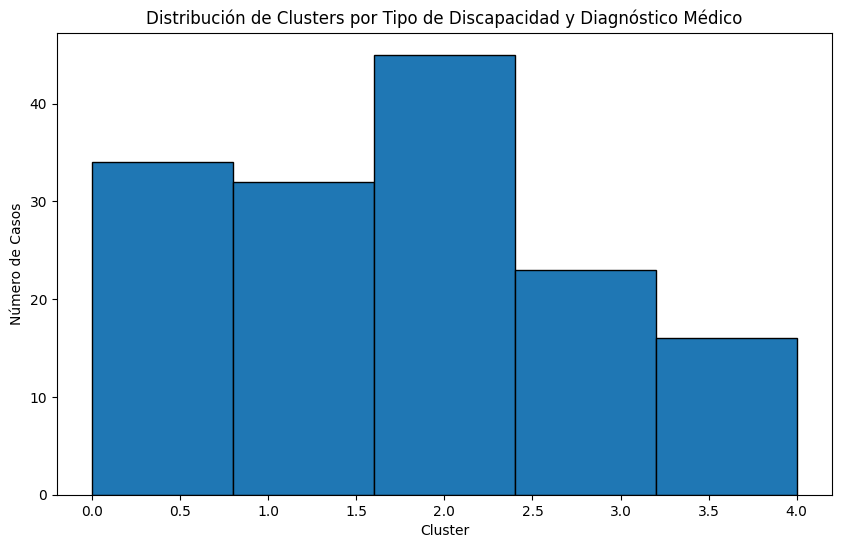


Cluster 0:
psicosocial, auditiva, hipoacusia, persona, bilateral, demencia, epilepticos, especificada, cognitiva, discapacidad

Cluster 1:
intelectual, aprendizaje, retraso, paralisis, epilepticos, mental, espastica, auditiva, bilateral, cognitiva

Cluster 2:
fisica, ojo, bilateral, paralisis, espastica, especificada, demencia, discapacidad, auditiva, cognitiva

Cluster 3:
multiple, hipoacusia, bilateral, espastica, mental, retraso, cognitiva, ojo, discapacidad, visual

Cluster 4:
visual, discapacidad, mental, psicosocial, especificada, auditiva, bilateral, cognitiva, demencia, epilepticos


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definicion de stop words en español
spanish_stop_words = ['a', 'al', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 
                     'durante', 'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por',
                     'según', 'sin', 'sobre', 'tras', 'el', 'la', 'los', 'las', 'un', 'una',
                     'unos', 'unas', 'y', 'o', 'pero', 'si', 'no', 'que', 'como', 'más',
                     'este', 'esta', 'estos', 'estas', 'aquel', 'aquella', 'aquellos',
                     'aquellas', 'mi', 'tu', 'su', 'nuestro', 'vuestro', 'cuyo', 'quien',
                     'donde', 'cuando', 'cuanto', 'cuanta', 'yo', 'me', 'mí', 'conmigo',
                     'tú', 'te', 'ti', 'contigo', 'él', 'ella', 'ello', 'sí', 'se', 'consigo',
                     'nosotros', 'nos', 'vosotros', 'os', 'ellos', 'ellas', 'les', 'lo', 'del']

# Carga de los datos
filepath = "combined_data.csv"
df = pd.read_csv(filepath, sep=',')

# Unificamos las columnas de tipo de discapacidad y diagnostico especifico para a partir de ahi hacer las recomendaciones de politicas
df['discapacidad_combinada'] = (
    df['Tipo de discapacidad'].fillna('') + ' ' + 
    df['Describa aqui el diagnostico medico'].fillna('')
)

# Limpiar los espacios adicionales
df['discapacidad_combinada'] = df['discapacidad_combinada'].str.strip()

# Aplicar TF-IDF con la lista personalizada de stop words
tfidf_vectorizer = TfidfVectorizer(
    stop_words=spanish_stop_words,
    min_df=2,  # Ignorar términos que aparecen en menos de 2 documentos
    max_df=0.95  # Ignorar términos que aparecen en más del 95% de los documentos
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['discapacidad_combinada'])

# Aplicar KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Añadir la etiqueta del cluster
df['cluster'] = kmeans.labels_

# Visualizar
plt.figure(figsize=(10, 6))
plt.hist(df['cluster'], bins=num_clusters, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Número de Casos')
plt.title('Distribución de Clusters por Tipo de Discapacidad y Diagnóstico Médico')
plt.show()

# Para ver las palabras más relevantes en cada cluster
def print_cluster_terms(vectorizer, kmeans, n_terms=10):
    centroids = kmeans.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"\nCluster {i}:")
        # Obtener los índices de los términos más importantes
        indices = centroids[i].argsort()[-n_terms:][::-1]
        print(", ".join([terms[j] for j in indices]))

#  términos más relevantes de cada cluster
print_cluster_terms(tfidf_vectorizer, kmeans)
df.to_csv('datos_con_discapacidad_clusters.csv', index=False, sep=';')

## Overview del codigo 

Este código implementa un modelo de análisis basado en procesamiento de texto y estadísticas para generar recomendaciones de políticas públicas en los diferentes municipios, enfocándose en personas con discapacidad (PcD) y hechos victimizantes. Se apoya en técnicas de procesamiento de lenguaje natural (NLP), estadísticas descriptivas y visualización de datos. La estructura general del código incluye:

* **Procesamiento de Datos:**
    * Limpieza y combinación de datos relacionados con tipos de discapacidad y diagnósticos médicos.
    * Agrupación de información por municipios para identificar patrones comunes.

* **Modelo de Similitud:**

    * Utiliza un modelo de TF-IDF (Term Frequency-Inverse Document Frequency) para representar las combinaciones de texto de cada municipio.
    * Calcula la similitud entre municipios mediante similitud coseno sobre la matriz TF-IDF, identificando aquellos municipios con contextos similares.

* **Generación de Recomendaciones:**

    * Analiza datos específicos de cada municipio, incluyendo:
        * Tipos principales de discapacidad.
        * Hechos victimizantes reportados.
        * Edad promedio de las PcD.
        * Porcentaje de PcD con cuidadores.

Basado en este análisis, aplicamos reglas predefinidas para proponer políticas y acciones específicas en áreas como infraestructura, accesibilidad, comunicación, apoyo a desplazados o adultos mayores, entre otros.

* **Visualización de Resultados:**

    * Incluye gráficos como:
        * Barras apiladas para mostrar la distribución de tipos de discapacidad por municipio.
        * Mapas de calor para necesidades de atención específicas.
        * Barras apiladas para visualizar hechos victimizantes.

* **Análisis Comparativo:**

    * Identifica los municipios con mayor cantidad de casos y genera resúmenes comparativos de las características clave y recomendaciones para cada uno.

## Características del modelo

**Modelo Utilizado:**

* TF-IDF Vectorizer: Modelo de representación de texto utilizado para cuantificar la importancia de términos en cada municipio.
Cosine Similarity: Métrica utilizada para medir similitud entre representaciones de texto.

**Procesamiento de Texto:**

* Combinación de columnas relevantes (Tipo de discapacidad, Diagnóstico médico) para crear un corpus textual.
Uso de un vocabulario dinámico con eliminación de palabras comunes irrelevantes (stop words) para mejorar la calidad de la matriz TF-IDF.

**Análisis Estadístico:**

* Identificación de tipos de discapacidad predominantes usando la frecuencia de términos.
Análisis de hechos victimizantes con un enfoque descriptivo.

**Recomendaciones Basadas en Regla:**

* Genera políticas específicas según:
    * Predominancia de ciertos tipos de discapacidad.
    * Incidencia de hechos victimizantes.
    * Características demográficas (como edad promedio o proporción de cuidadores).

**Visualización:**

* Utilizamos matplotlib y seaborn para representar patrones de discapacidad y necesidades de atención.
Gráficos de barras, mapas de calor y distribuciones de hechos victimizantes.

**Codigo MOdular:**

* metodos específicos para cada tarea:
    * get_policy_recommendations: Genera recomendaciones para un municipio.
    * analyze_multiple_municipalities: Realiza análisis sobre múltiples municipios destacados.
    create_disability_visualization: Produce visualizaciones significativas para los resultados.

**Escalabilidad:**

* Adecuado para ampliar a más municipios o integrar con datos adicionales, siempre que sigan el mismo formato.



Procesando municipio: Bello
Tipos principales: {'Psicosocial': 776, 'Fisica': 543, 'Multiple': 409}
Total casos: 1728
Física count: 543, score: 0.3142361111111111
Visual count: 0, score: 0.0
Auditiva count: 0, score: 0.0
Cognitiva count: 776, score: 0.44907407407407407

Procesando municipio: Guarne
Tipos principales: {'Fisica': 419, 'Psicosocial': 352, 'Multiple': 144}
Total casos: 915
Física count: 419, score: 0.45792349726775955
Visual count: 0, score: 0.0
Auditiva count: 0, score: 0.0
Cognitiva count: 352, score: 0.3846994535519126

Procesando municipio: Necocli
Tipos principales: {'Fisica': 421, 'Psicosocial': 198, 'Multiple': 173}
Total casos: 792
Física count: 421, score: 0.5315656565656566
Visual count: 0, score: 0.0
Auditiva count: 0, score: 0.0
Cognitiva count: 198, score: 0.25

Procesando municipio: Itagüi
Tipos principales: {'Intelectual': 413, 'Fisica': 185, 'Multiple': 144}
Total casos: 742
Física count: 185, score: 0.24932614555256064
Visual count: 0, score: 0.0
Auditiva

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1136\3024235377.py:342: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x1000 with 0 Axes>

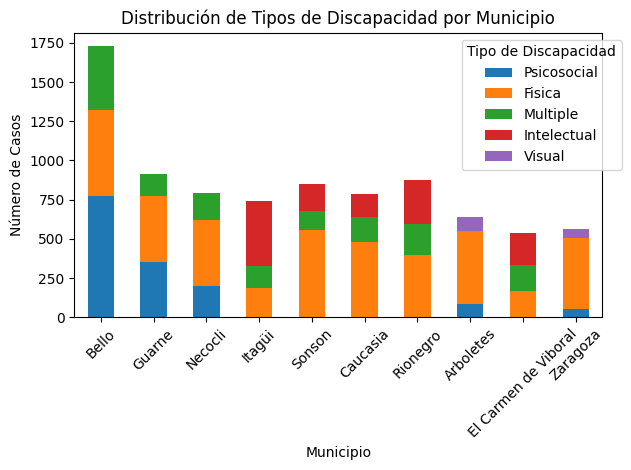

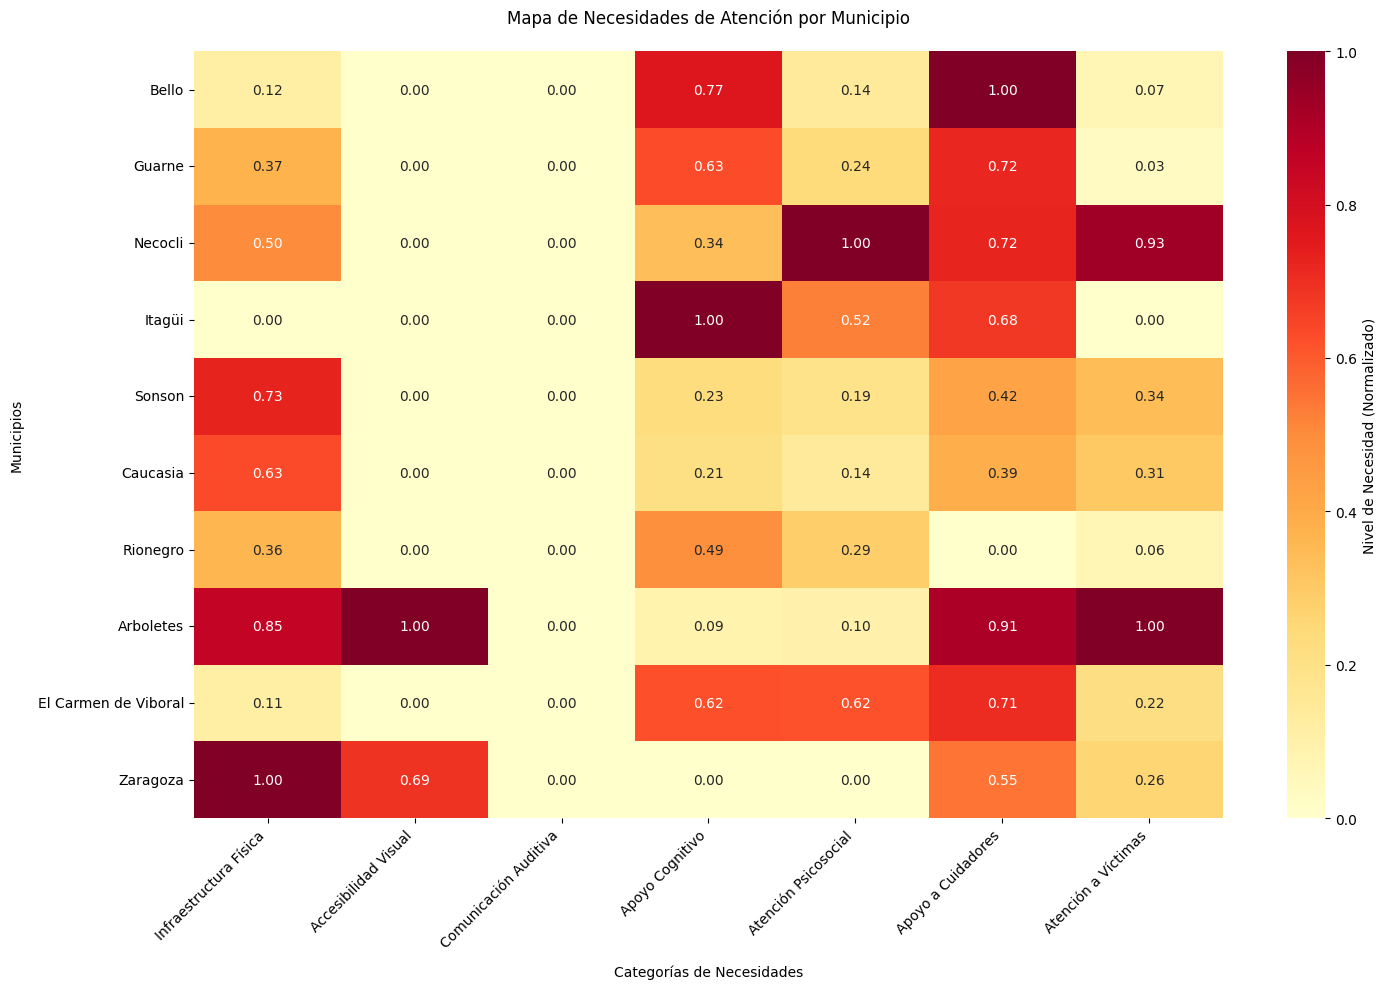

<Figure size 1500x800 with 0 Axes>

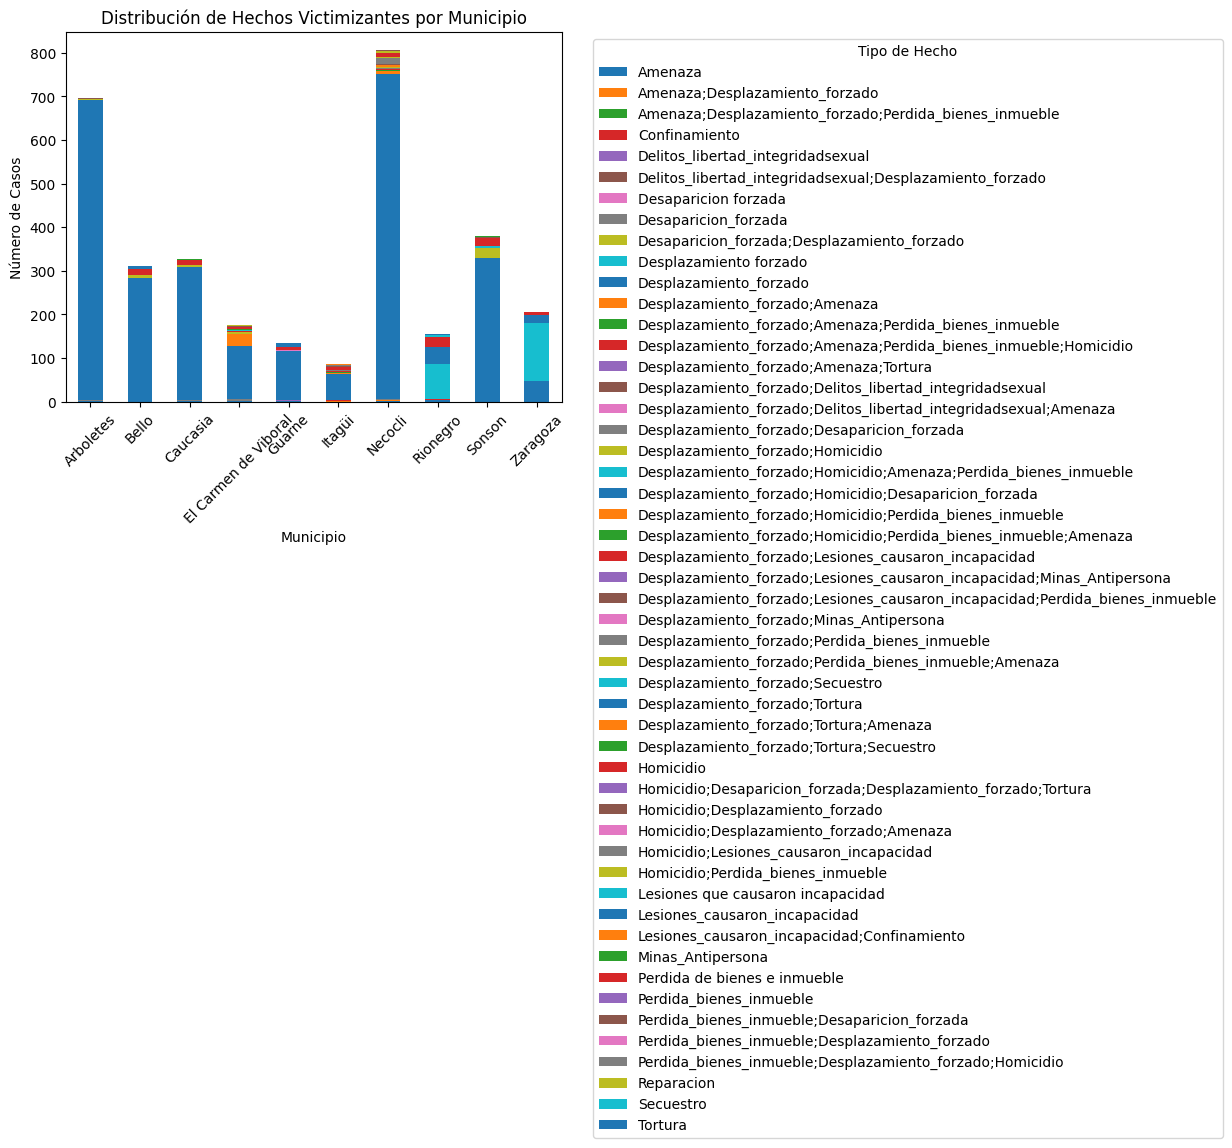

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar los datos
filepath = "clean_pcd_data.csv"
df = pd.read_csv(filepath, sep=',')

# Combinar la información de discapacidad
df['discapacidad_combinada'] = (
    df['Tipo de discapacidad'].fillna('') + ' ' + 
    df['Describa aqui el diagnostico medico'].fillna('')
)

# Agrupar por municipio
municipios_discapacidades = df.groupby('Municipio de residencia (PcD)')['discapacidad_combinada'].agg(
    lambda x: ' '.join(x)
).reset_index()

# 2. Crear matriz TF-IDF por municipio
tfidf = TfidfVectorizer(
    min_df=2,
    max_df=0.95,
    stop_words=spanish_stop_words
)
tfidf_matrix = tfidf.fit_transform(municipios_discapacidades['discapacidad_combinada'])

# 3. Calcular similitud entre municipios
similarity_matrix = cosine_similarity(tfidf_matrix)

def get_policy_recommendations(municipio, top_n=5):
    """
    Genera recomendaciones de políticas priorizadas según la prevalencia de cada tipo de discapacidad
    y hecho victimizante
    """
    # Obtener datos del municipio
    municipio_data = df[df['Municipio de residencia (PcD)'] == municipio]
    
    # Análisis de tipos de discapacidad
    tipos_discapacidad = Counter(
        [tipo.strip() for tipos in municipio_data['Tipo de discapacidad'].dropna() 
         for tipo in tipos.split(',')]
    )
    
    # Calcular porcentajes de cada tipo de discapacidad
    total_discapacidades = sum(tipos_discapacidad.values())
    porcentajes_discapacidad = {
        tipo: (count / total_discapacidades * 100) 
        for tipo, count in tipos_discapacidad.items()
    }
    
    # Analizar hechos victimizantes
    hechos_victimizantes = Counter()
    for col in [c for c in municipio_data.columns if 'hecho victimizante' in c.lower()]:
        hechos = municipio_data[col].value_counts()
        for hecho, count in hechos.items():
            if pd.notna(hecho) and hecho != '':
                hechos_victimizantes[hecho] += count
    
    # Calcular porcentajes de hechos victimizantes
    total_hechos = sum(hechos_victimizantes.values())
    porcentajes_hechos = {
        hecho: (count / total_hechos * 100) if total_hechos > 0 else 0
        for hecho, count in hechos_victimizantes.items()
    }
    
    # Diccionario de recomendaciones por tipo
    recomendaciones_base = {
        'Física': {
            'tipo': 'Infraestructura y Movilidad',
            'acciones': [
                'Implementar rampas y accesos adaptados en espacios públicos',
                'Adaptar el transporte público con elevadores',
                'Crear espacios deportivos adaptados',
                'Instalar señalización táctil en vías públicas'
            ],
            'prioridad': porcentajes_discapacidad.get('Física', 0)
        },
        'Visual': {
            'tipo': 'Accesibilidad Visual',
            'acciones': [
                'Implementar señalización en Braille',
                'Instalar semáforos sonoros',
                'Crear programas de capacitación en tecnologías asistivas',
            ],
            'prioridad': porcentajes_discapacidad.get('Visual', 0)
        },
        'Auditiva': {
            'tipo': 'Comunicación y Accesibilidad Auditiva',
            'acciones': [
                'Capacitar personal en lengua de señas',
                'Implementar servicios de interpretación',
                'Instalar sistemas de alerta visual',
                'Crear programas de inclusión laboral específicos'
            ],
            'prioridad': porcentajes_discapacidad.get('Auditiva', 0)
        },
        'Cognitiva': {
            'tipo': 'Apoyo Cognitivo',
            'acciones': [
                'Implementar señalización con pictogramas',
                'Crear programas de estimulación cognitiva',
                'Desarrollar materiales educativos adaptados',
                'Establecer rutas de atención simplificadas'
            ],
            'prioridad': porcentajes_discapacidad.get('Cognitiva', 0)
        }
    }
    
    # Recomendaciones por hechos victimizantes
    recomendaciones_victimas = {
        'Desplazamiento': {
            'tipo': 'Atención a Población Desplazada',
            'acciones': [
                'Programas de vivienda adaptada para PcD desplazadas',
                'Apoyo psicosocial especializado',
                'Ayudas económicas para reubicación',
                'Programas de integración comunitaria'
            ],
            'prioridad': sum(porcentajes_hechos.get(k, 0) for k in porcentajes_hechos if 'desplaza' in k.lower())
        },
        'Violencia': {
            'tipo': 'Protección y Seguridad',
            'acciones': [
                'Protocolos especiales de protección para PcD víctimas',
                'Línea de atención preferencial',
                'Capacitación a fuerzas de seguridad',
                'Rutas de atención específicas'
            ],
            'prioridad': sum(porcentajes_hechos.get(k, 0) for k in porcentajes_hechos if 'violen' in k.lower())
        }
    }
    
    # Combinar todas las recomendaciones y ordenar por prioridad
    todas_recomendaciones = []
    
    # Agregar recomendaciones por tipo de discapacidad si superan un umbral mínimo (e.g., 5%)
    for tipo, rec in recomendaciones_base.items():
        if rec['prioridad'] >= 5:
            todas_recomendaciones.append({
                'tipo': rec['tipo'],
                'acciones': rec['acciones'],
                'prioridad': rec['prioridad'],
                'fuente': f'Discapacidad {tipo}'
            })
    
    # Agregar recomendaciones por hechos victimizantes si superan un umbral mínimo
    for tipo, rec in recomendaciones_victimas.items():
        if rec['prioridad'] >= 5:
            todas_recomendaciones.append({
                'tipo': rec['tipo'],
                'acciones': rec['acciones'],
                'prioridad': rec['prioridad'],
                'fuente': f'Hecho Victimizante: {tipo}'
            })
    
    # Ordenar recomendaciones por prioridad
    todas_recomendaciones.sort(key=lambda x: x['prioridad'], reverse=True)
    
    # Estructurar resultado final
    resultado = {
        'municipio': municipio,
        'perfil': {
            'total_casos': len(municipio_data),
            'tipos_principales': {k: v for k, v in tipos_discapacidad.most_common(3)},
            'edad_promedio': municipio_data['Edad de la PcD'].mean(),
            'pct_con_cuidador': (municipio_data['Tiene cuidador'] == 'Si').mean() * 100,
            'hechos_victimizantes': dict(hechos_victimizantes.most_common())
        },
        'recomendaciones': todas_recomendaciones
    }
    
    return resultado


def create_disability_visualization(df, resultados):
    """
    Crea visualizaciones significativas incluyendo hechos victimizantes
    """
    # 1. Gráfico de barras apiladas de tipos de discapacidad por municipio
    plt.figure(figsize=(15, 10))
    
    # Preparar datos para el gráfico
    municipios_data = []
    for res in resultados:
        municipio = res['municipio']
        tipos = res['perfil']['tipos_principales']
        tipos_dict = {'municipio': municipio}
        tipos_dict.update(tipos)
        municipios_data.append(tipos_dict)
    
    # Crear DataFrame para la visualización
    viz_df = pd.DataFrame(municipios_data)
    viz_df.set_index('municipio', inplace=True)
    
    # Crear gráfico
    ax = viz_df.plot(kind='bar', stacked=True)
    plt.title('Distribución de Tipos de Discapacidad por Municipio')
    plt.xlabel('Municipio')
    plt.ylabel('Número de Casos')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Discapacidad', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    # 2. Mapa de calor de necesidades de atención    
    # Definir categorías de necesidades más específicas
    necesidades = [
        'Infraestructura Física',
        'Accesibilidad Visual',
        'Comunicación Auditiva',
        'Apoyo Cognitivo',
        'Atención Psicosocial',
        'Apoyo a Cuidadores',
        'Atención a Víctimas'
    ]
    
    # Crear matriz de necesidades 
    municipios = [res['municipio'] for res in resultados]
    matriz_necesidades = np.zeros((len(municipios), len(necesidades)))
    
    # Función auxiliar para encontrar tipos de discapacidad
    def find_disability_type(tipos_dict, disability_keywords):
        count = 0
        for tipo, valor in tipos_dict.items():
            if any(keyword.lower() in tipo.lower() for keyword in disability_keywords):
                count += valor
        return count
    
    for i, res in enumerate(resultados):
        # Imprimir información de debugging
        print(f"\nProcesando municipio: {res['municipio']}")
        print("Tipos principales:", res['perfil']['tipos_principales'])
        
        # Analizar tipos de discapacidad principales
        tipos_principales = res['perfil']['tipos_principales']
        total_casos = sum(tipos_principales.values())
        
        print(f"Total casos: {total_casos}")
        
        # Calcular porcentajes de necesidad basados en tipos de discapacidad y datos del perfil
        for j, necesidad in enumerate(necesidades):
            score = 0
            if necesidad == 'Infraestructura Física':
                # Buscar cualquier tipo que contenga palabras relacionadas con discapacidad física
                fisica_count = find_disability_type(tipos_principales, 
                    ['fisica', 'físic', 'motor', 'movimiento', 'movilidad', 'desplazamiento'])
                score = fisica_count / total_casos if total_casos > 0 else 0
                print(f"Física count: {fisica_count}, score: {score}")
                
            elif necesidad == 'Accesibilidad Visual':
                # Buscar tipos relacionados con discapacidad visual
                visual_count = find_disability_type(tipos_principales,
                    ['visual', 'vist', 'ceguera', 'invidente'])
                score = visual_count / total_casos if total_casos > 0 else 0
                print(f"Visual count: {visual_count}, score: {score}")
                
            elif necesidad == 'Comunicación Auditiva':
                # Buscar tipos relacionados con discapacidad auditiva
                auditiva_count = find_disability_type(tipos_principales,
                    ['audit', 'sord', 'oido', 'oído'])
                score = auditiva_count / total_casos if total_casos > 0 else 0
                print(f"Auditiva count: {auditiva_count}, score: {score}")
                
            elif necesidad == 'Apoyo Cognitivo':
                # Buscar tipos relacionados con discapacidad cognitiva
                cognitiva_count = find_disability_type(tipos_principales,
                    ['cognit', 'mental', 'intelectual', 'psicosocial', 'aprend', 'autis'])
                score = cognitiva_count / total_casos if total_casos > 0 else 0
                print(f"Cognitiva count: {cognitiva_count}, score: {score}")
                
            elif necesidad == 'Atención Psicosocial':
                score = len(res['perfil']['hechos_victimizantes']) / 10  # Normalizado
                
            elif necesidad == 'Apoyo a Cuidadores':
                score = res['perfil']['pct_con_cuidador'] / 100
                
            elif necesidad == 'Atención a Víctimas':
                score = sum(res['perfil']['hechos_victimizantes'].values()) / total_casos if total_casos > 0 else 0
            
            matriz_necesidades[i, j] = score
    
    # Normalizar la matriz para mejor visualización
    matriz_normalizada = matriz_necesidades.copy()
    for j in range(matriz_necesidades.shape[1]):
        columna = matriz_necesidades[:, j]
        if columna.max() - columna.min() > 0:  # Evitar división por cero
            matriz_normalizada[:, j] = (columna - columna.min()) / (columna.max() - columna.min())
    
    # Crear mapa de calor mejorado
    plt.figure(figsize=(15, 10))
    sns.heatmap(matriz_normalizada,
                xticklabels=necesidades,
                yticklabels=municipios,
                cmap='YlOrRd',
                annot=True,  # Mostrar valores
                fmt='.2f',   # Formato de dos decimales
                cbar_kws={'label': 'Nivel de Necesidad (Normalizado)'})
    
    plt.title('Mapa de Necesidades de Atención por Municipio', pad=20)
    plt.xlabel('Categorías de Necesidades', labelpad=10)
    plt.ylabel('Municipios', labelpad=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    
    
    # 3. Gráfico de hechos victimizantes por municipio
    plt.figure(figsize=(15, 8))
    
    # Preparar datos de hechos victimizantes
    hechos_data = []
    for res in resultados:
        for hecho, count in res['perfil']['hechos_victimizantes'].items():
            hechos_data.append({
                'municipio': res['municipio'],
                'hecho': hecho,
                'count': count
            })
    
    # Crear DataFrame para visualización
    hechos_df = pd.DataFrame(hechos_data)
    
    if not hechos_df.empty:
        # Crear gráfico de barras apiladas
        pivot_table = hechos_df.pivot_table(
            index='municipio',
            columns='hecho',
            values='count',
            fill_value=0
        )
        
        ax = pivot_table.plot(kind='bar', stacked=True)
        plt.title('Distribución de Hechos Victimizantes por Municipio')
        plt.xlabel('Municipio')
        plt.ylabel('Número de Casos')
        plt.xticks(rotation=45)
        plt.legend(title='Tipo de Hecho', bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
    
    return plt.gcf()

def generate_complete_analysis(df, n_municipios=10):
    """
    Genera un análisis completo con recomendaciones priorizadas
    """
    # Obtener los municipios con más casos
    top_municipios = df['Municipio de residencia (PcD)'].value_counts().head(n_municipios).index
    
    # Almacenar resultados
    resultados = []
    
    for municipio in top_municipios:
        recomendaciones = get_policy_recommendations(municipio)
        resultados.append(recomendaciones)
    
    # Crear visualizaciones
    figuras = create_disability_visualization(df, resultados)
    
    # Imprimir resumen detallado
    print("\nANÁLISIS PRIORIZADO POR MUNICIPIO")
    print("=" * 50)
    
    for resultado in resultados:
        print(f"\nMUNICIPIO: {resultado['municipio']}")
        print("-" * 30)
        
        print("\nPerfil del municipio:")
        print(f"Total casos: {resultado['perfil']['total_casos']}")
        print(f"Edad promedio: {resultado['perfil']['edad_promedio']:.1f} años")
        print(f"Porcentaje con cuidador: {resultado['perfil']['pct_con_cuidador']:.1f}%")
        
        print("\nTipos principales de discapacidad:")
        for tipo, cantidad in resultado['perfil']['tipos_principales'].items():
            print(f"- {tipo}: {cantidad} casos")
        
        print("\nRecomendaciones priorizadas:")
        for i, rec in enumerate(resultado['recomendaciones'], 1):
            print(f"\n{i}. {rec['tipo']} (Prioridad: {rec['prioridad']:.1f}%)")
            print(f"   Basado en: {rec['fuente']}")
            for accion in rec['acciones']:
                print(f"   - {accion}")
    
    return resultados, figuras

# Ejecutar el análisis
resultados, figuras = generate_complete_analysis(df)
plt.show()

Si bien es posible ejecutar esta línea de código con nuestro dataset de ejemplo, es efecto de este modelo se visualiza mejor al usar el dataset completo.

# Validación del Modelo

In [28]:
def show_validation_results(df, resultados):
    """
    Muestra un reporte completo de validación con todos los resultados
    """
    print("\n============= REPORTE DE VALIDACIÓN DEL MODELO =============\n")
    
    # 1. VALIDACIÓN DE DATOS
    print("\n1. CALIDAD DE LOS DATOS")
    print("=" * 50)
    
    # Estadísticas generales
    print("\nEstadísticas Generales:")
    print(f"Total de registros: {len(df):,}")
    print(f"Total de municipios: {df['Municipio de residencia (PcD)'].nunique():,}")
    
    # Tipos de discapacidad
    print("\nDistribución de Tipos de Discapacidad:")
    tipos_disc = df['Tipo de discapacidad'].value_counts()
    for tipo, count in tipos_disc.items():
        porcentaje = (count/len(df))*100
        print(f"- {tipo}: {count:,} ({porcentaje:.1f}%)")
    
    
    # 2. RESUMEN Y RECOMENDACIONES
    print("\n4. RESUMEN Y RECOMENDACIONES")
    print("=" * 50)
    
    # Verificar consistencia de datos
    warnings = []
    
    # Verificar municipios sin casos
    municipios_sin_casos = [r['municipio'] for r in resultados if r['perfil']['total_casos'] == 0]
    if municipios_sin_casos:
        warnings.append(f"- Hay {len(municipios_sin_casos)} municipios sin casos registrados")
    
    # Verificar municipios sin recomendaciones
    municipios_sin_recs = [r['municipio'] for r in resultados if not r['recomendaciones']]
    if municipios_sin_recs:
        warnings.append(f"- Hay {len(municipios_sin_recs)} municipios sin recomendaciones")
    
    # Mostrar advertencias si existen
    if warnings:
        print("\nAdvertencias encontradas:")
        for warning in warnings:
            print(warning)
    else:
        print("\n✓ No se encontraron problemas graves en el modelo")

    return {
        'total_registros': len(df),
        'total_municipios': df['Municipio de residencia (PcD)'].nunique(),
        'distribucion_tipos': tipos_disc.to_dict(),
        'warnings': warnings
    }

resultados_validacion = show_validation_results(df, resultados)


============= REPORTE DE VALIDACIÓN DEL MODELO =============


1. CALIDAD DE LOS DATOS

Estadísticas Generales:
Total de registros: 36,911
Total de municipios: 126

Distribución de Tipos de Discapacidad:
- Fisica: 14,317 (38.8%)
- Multiple: 6,179 (16.7%)
- Intelectual: 6,004 (16.3%)
- Psicosocial: 5,896 (16.0%)
- Visual: 2,708 (7.3%)
- Auditiva: 1,665 (4.5%)
- Sordoceguera: 107 (0.3%)
- Auditiva : 34 (0.1%)
- Psicosocial : 1 (0.0%)

4. RESUMEN Y RECOMENDACIONES

✓ No se encontraron problemas graves en el modelo
